# Proyecto modulo 3 - Modelo masa resorte amortiguador

### Objetivos

- Explicar el movimiento de un oscilador armonico simple amortiguado.

  - Definir el modelo a resolver.
  - Explicar los casos de interes.
  - Crear un programa que pueda "resolver" ecuaciones diferenciales de orden superior.  

### Modelo que representa el problema

Definimos nuestra modelo

$$ \frac{d^2 x}{dt^2} + 2\beta\frac{dx}{dt} + \omega_{0}^2 x = 0. $$

Donde $\beta$ es el factor de amortiguamiento y $\omega_{0}$ la pulsación propia del sistema.

El problema con el modelo anterior es que python solo puede trabajar con ecuaciones diferenciales de primer orden de la forma:

$$ \frac{d x}{dt} = f(x,t) $$

Por lo que nos vemos obligados a modificar nuestro modelo haciendo  una reducción de orden.

Sabemos que:

$$ Velocidad [v] =  \frac{dx}{dt}  $$

Y que:

$$ Aceleración [a] =  \frac{dv}{dt}  = \frac{d^2 x}{dt^2}  $$

Por lo que reemplazaremos todos los 

$$ \frac{d^2 x}{dt^2}$$  por  $$\frac{dv}{dt}   $$

Y 

$$ \frac{dx}{dt}$$  por $$ v   $$

Haciendo estos cambios nuestro modelo queda como:

$$ \frac{dv}{dt} + 2\beta v + \omega_{0}^2 x = 0. $$

Despejando:

$$ \frac{dv}{dt} = - 2\beta v - \omega_{0}^2 x $$

De esta manera obtenemos un sistema posible de resolver.

Para obtener la velocidad solo es necesario derivar la posición

$$ \frac{dx}{dt} = v $$

Cabe remarcar que este modelo tiene 3 casos de interes los cuales se expondran en la siguiente sección.

### Simulaciones y visualización de resultados

Importamos las librerias

In [53]:
import numpy as np
from scipy.integrate import solve_ivp, odeint

import matplotlib.pyplot as plt
%matplotlib inline

Definimos la ecuacion diferencial a resolver

In [4]:
def ED2(t,arreglo):
    return np.asarray([arreglo[1],-2*B*arreglo[1]-arreglo[0]*w0**2])

Definimos nuestras condiciones iniciales

In [26]:
tspan = [0, 5] #Rango de tiempo
x0=0 #Posicion inicial
v0=0.5 #Velocidad inicial
VO = np.array([x0,v0]) #Valores iniciales

#### _Caso 1_: Movimiento oscilatorio amortiguado 

$$ \omega^2 >\beta^2 $$

Condiciones iniciales para el _Caso 1_

In [16]:
w0 = 5 #Frecuencia inicial
B= 1 #Factor de amortiguamiento

Resolvemos el sistema

In [27]:
sol_x1 = solve_ivp(ED2, tspan, VO, max_step=0.1)

Graficamos

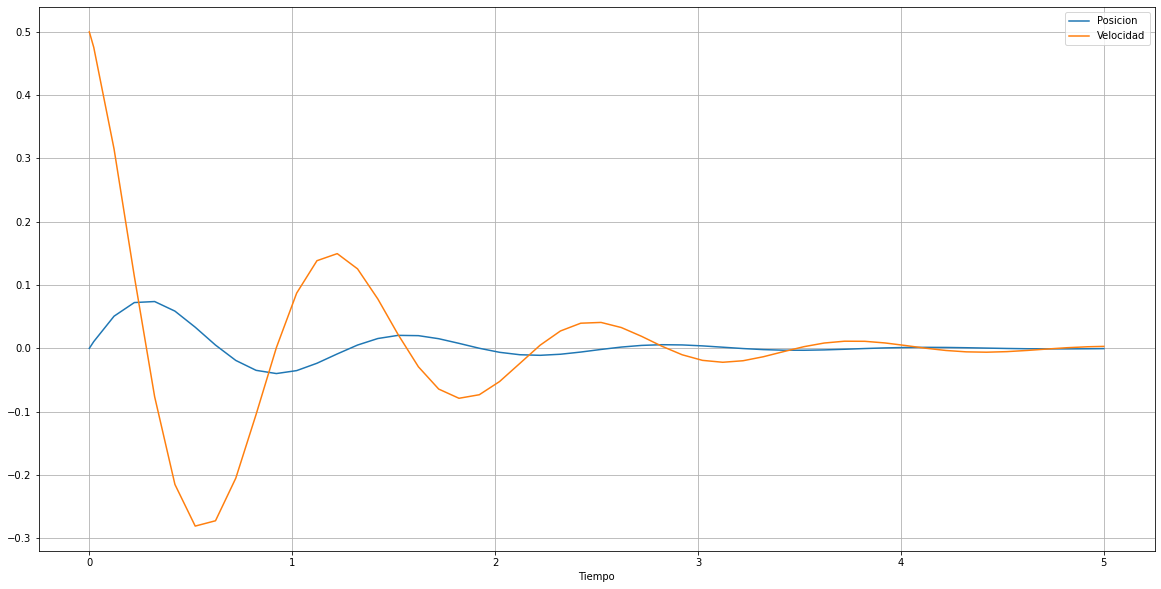

In [46]:
plt.figure()
plt.plot(sol_x1.t, sol_x1.y[0, :], label="Posicion")
plt.plot(sol_x1.t, sol_x1.y[1, :], label="Velocidad")
plt.legend(loc="best")
plt.xlabel("Tiempo")
plt.rcParams["figure.figsize"] = (15, 10)
plt.grid()

La amplituD del movimiento decrece con el tiempo y forma un envolvente para las oscilaciones.

#### _Caso 2_: Movimiento aperiódico crítico 

$$ \omega^2 =\beta^2 $$

Condiciones iniciales para el _Caso 2_

In [34]:
w0 = 5 #Frecuencia inicial
B= 5 #Factor de amortiguamiento

Resolvemos le sistema

In [48]:
sol_x2 = solve_ivp(ED2, tspan, VO, max_step=0.1)

Graficamos

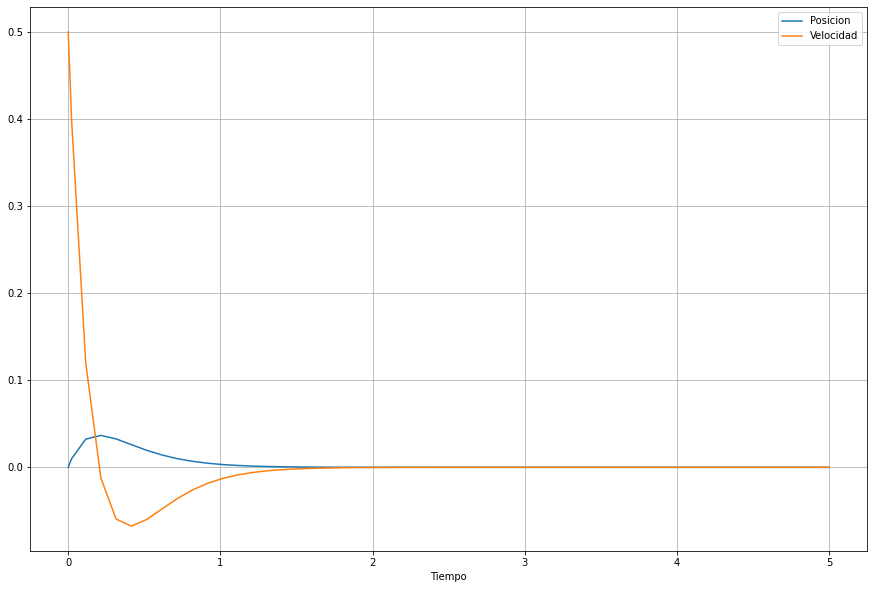

In [49]:
plt.figure()
plt.plot(sol_x2.t, sol_x2.y[0, :], label="Posicion")
plt.plot(sol_x2.t, sol_x2.y[1, :], label="Velocidad")
plt.legend(loc="best")
plt.xlabel("Tiempo")
plt.rcParams["figure.figsize"] = (15, 10)
plt.grid()

Vemos el amortiguamiento a una velocidad inicial nula.

#### _Caso 3_: Movimiento sobreamortiguado

$$ \omega^2 <\beta^2 $$

Condiciones iniciales para el _Caso 3_

In [50]:
w0 = 1 #Frecuencia inicial
B= 5 #Factor de amortiguamiento

Resolvemos le sistema

In [51]:
sol_x3 = solve_ivp(ED2, tspan, VO, max_step=0.1)

Graficamos

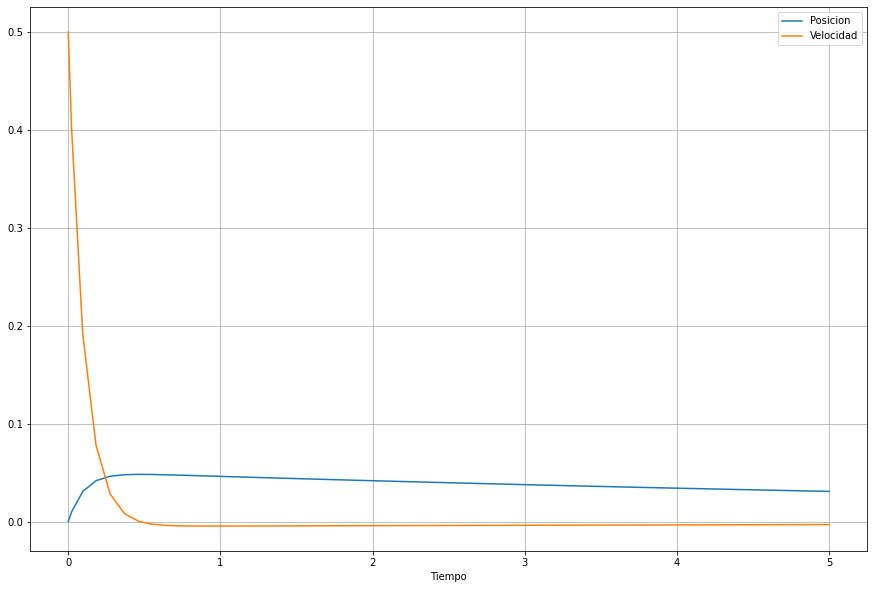

In [52]:
plt.figure()
plt.plot(sol_x3.t, sol_x3.y[0, :], label="Posicion")
plt.plot(sol_x3.t, sol_x3.y[1, :], label="Velocidad")
plt.legend(loc="best")
plt.xlabel("Tiempo")
plt.rcParams["figure.figsize"] = (15, 10)
plt.grid()

Podemos notar que este no es un movimiento oscilatorio pero dependiendo el valor inicial de la velocidad puede ocurri que la posición cambie de signo antes de se aproxime a su valor nulo.

### Conclusiones

Pese a que uno de los objetivos principales de encargar este proyecto haya sido repasar métodos para resolver ecuaciones diferenciales debo decir que, como tal, el proyecto ayuda mayormente a entender de una manera mas visual los efectos de las oscilaciones amortiguadas vistos en materias como _Mecánica clásica_ y un poco en _Ecuaciones diferenciales_ aun asi opino que el método para reducir el orden de una ED es sumamente útil pues la  mayoria de las ED usadas son de orden superior.

### Referencias

- Jerry B. (1998). _DINÁMICA CLÁSICA DE LAS PARTÍCULAS Y SISTEMAS_. (2°ed.) España, Barcelona: REVERTÉ, s.a.

- Jerry B. and Stephen T. (2003). _CLASSICAL DYNAMICS OF PARTICLES AND SYSTEMS_. (5°ed.) E.U, Virginia: Thomson Brooks/Cole.